In [11]:
import cv2
import random
import numpy as np

rena_s = cv2.imread("./asset_imgs/rena-s.jpg", cv2.IMREAD_GRAYSCALE)
if rena_s is None:
    print("Image Read Error")
print( "rena_s shape:", rena_s.shape)

def paddingImg(img,n):
    padding_img = np.zeros( (img.shape[0]+n+n,img.shape[1]+n+n),dtype=img.dtype)
    padding_img[n:-n,n:-n]= img
    return padding_img

def smoothing(img):
    smooth_filter = np.array( [[1,2,1],[2,4,2],[1,2,1]])/16
    padding = 1
    img_p = paddingImg(img,padding)
    print("padding_img",img_p.shape)
    print("")
    for y in range( padding , img_p.shape[0]-padding-1-1):
        for x in range( padding , img_p.shape[1]-padding-1-1):
            #print( y,x ,y-padding, y+padding+1,x-padding,x+padding+1 )
            img_p[y,x] = np.clip(np.sum(img[ y-padding:y+padding+1,x-padding:x+padding+1] * smooth_filter),0,255)
    return img_p[padding:-(padding+1),padding:-(padding+1)]

smoothing_img = smoothing( rena_s )

def sharpening( img ):
    sharp_filter = np.ones((3,3), dtype=np.uint8)*-1
    sharp_filter[1,1] = 17
    sharp_filter = sharp_filter * (1/17)
    padding = 1
    img_p = paddingImg(img,padding)
    for y in range( padding , img_p.shape[0]-padding-1-1):
        for x in range( padding , img_p.shape[1]-padding-1-1):
            img_p[y,x] = np.clip(np.sum(img[ y-padding:y+padding+1,x-padding:x+padding+1] * sharp_filter),0,255)
    return img_p[padding:-(padding+1),padding:-(padding+1)]

sharpening_img = sharpening( rena_s )

rena_salt = rena_s.copy()
#add ramdom noise in rena-s
idxs = list(range(rena_salt.shape[0]*rena_salt.shape[1]))
for i in range( 100): #add salt
    pixel = random.randrange(0,len(idxs))
    rena_salt[ pixel// rena_salt.shape[0], pixel % rena_salt.shape[1]] = 255
    idxs.pop(pixel)
for i in range( 100): #add peper
    pixel = random.randrange(0,len(idxs))
    rena_salt[ pixel// rena_salt.shape[0], pixel % rena_salt.shape[1]] = 0
    idxs.pop(pixel)
    
def gaussian( img ):
    gaussian_filter = np.array( [ [0,1,2,1,0],
                                 [1,3,5,3,1],
                                 [2,5,9,5,2],
                                 [1,3,5,3,1],
                                 [0,1,2,1,0]])/33
    padding = 2
    img_p = paddingImg(img,padding)
    for y in range( padding, img_p.shape[0]-padding-1-1-1-1):
        for x in range( padding, img_p.shape[1]-padding-1-1-1-1):
            img_p[y,x] = np.clip(np.sum(img[ y-padding:y+padding+1,x-padding:x+padding+1] * gaussian_filter),0,255)
    return img_p[padding:-(padding+1),padding:-(padding+1)]

gaussian_img = gaussian( rena_salt)
   
def laplacian( img ):
    laplacian_filter = np.array([[0,0,-1,0,0],
                                 [0,-1,-2,-1,0],
                                 [-1,-2,16,-2,-1],
                                 [0,-1,-2,-1,0],
                                 [0,0,-1,0,0]])
    padding = 2
    img_p = paddingImg(img,padding)
    for y in range( padding, img_p.shape[0]-padding-1-1-1-1):
        for x in range( padding, img_p.shape[1]-padding-1-1-1-1):
            img_p[y,x] = np.clip(np.sum(img[ y-padding:y+padding+1,x-padding:x+padding+1] * laplacian_filter),0,255)
    return img_p[padding:-(padding+1),padding:-(padding+1)]
laplacian_img = laplacian( rena_salt)

def median( img ):
    padding = 2
    img_p = paddingImg(img,padding)
    for y in range( padding, img_p.shape[0]-padding-1-1-1-1):
        for x in range( padding, img_p.shape[1]-padding-1-1-1-1):
            arr = sorted(img[y-padding:y+padding+1,x-padding:x+padding+1].reshape(1,-1)[0])
            img_p[y,x]= arr[len(arr)//2]
    return img_p[padding:-(padding+1),padding:-(padding+1)]

median_img = median(rena_salt)

def weightedMedian( img ):
    padding = 2
    img_p = paddingImg(img,padding)
    weight_matrix = [1,2,1,2,3,2,1,2,1]
    for y in range( padding, img_p.shape[0]-padding-1-1):
        for x in range( padding, img_p.shape[1]-padding-1-1):
            window = img[y-padding:y+padding+1,x-padding:x+padding+1].reshape(1,-1)[0]
            arr = []
            for i in range( 9):
                for j in range( weight_matrix[i]):
                    arr.append( window[i] )
            arr = sorted( arr )
            img_p[y,x]= arr[len(arr)//2]
    return img_p[padding:-(padding+1),padding:-(padding+1)]

weightedMedian_img = weightedMedian( rena_salt )

cv2.imshow("rena", rena_s)
cv2.imshow("rena_salt",rena_salt)
cv2.imshow("smoothing", smoothing_img)
cv2.imshow("sharpening", sharpening_img)
cv2.imshow("guassian", gaussian_img)
cv2.imshow("laplacian",laplacian_img)
cv2.imshow("median",median_img)
cv2.imshow("weightedMedian",weightedMedian_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

rena_s shape: (200, 200)
padding_img (202, 202)



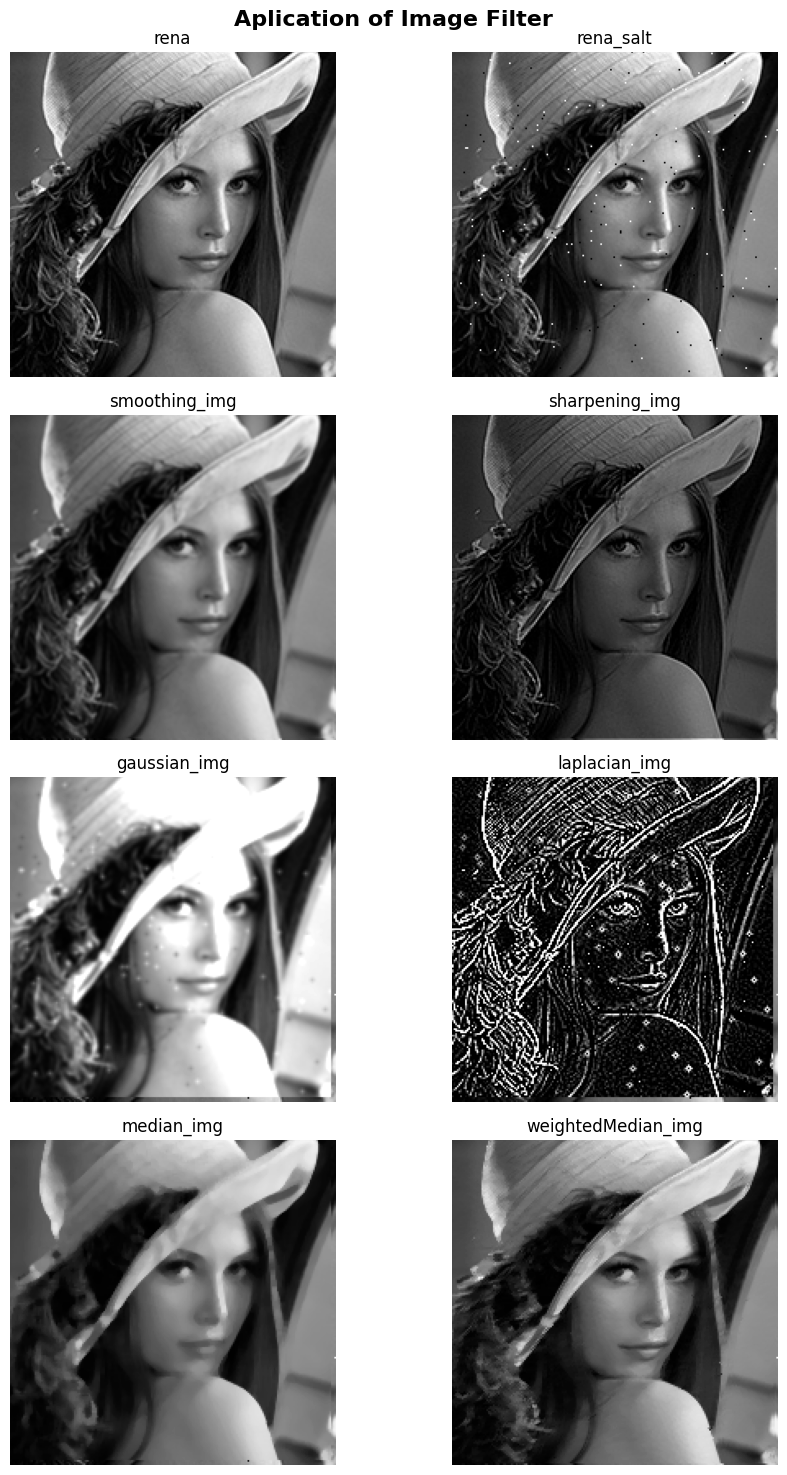

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.subplot(421), plt.imshow(rena_s, cmap="gray"), plt.title('rena'), plt.axis('off')
plt.subplot(422), plt.imshow(rena_salt, cmap="gray"), plt.title('rena_salt'), plt.axis('off')
plt.subplot(423), plt.imshow(smoothing_img, cmap="gray"), plt.title('smoothing_img'), plt.axis('off')
plt.subplot(424), plt.imshow(sharpening_img, cmap="gray"), plt.title('sharpening_img'), plt.axis('off')
plt.subplot(425), plt.imshow(gaussian_img, cmap="gray"), plt.title('gaussian_img'), plt.axis('off')
plt.subplot(426), plt.imshow(laplacian_img, cmap="gray"), plt.title('laplacian_img'), plt.axis('off')
plt.subplot(427), plt.imshow(median_img, cmap="gray"), plt.title('median_img'), plt.axis('off')
plt.subplot(428), plt.imshow(weightedMedian_img, cmap="gray"), plt.title('weightedMedian_img'), plt.axis('off')
plt.suptitle('Aplication of Image Filter', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()